Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import fcluster

Read in Data

In [3]:

WINE = pd.read_csv("wine-clustering.csv")

print(WINE.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

PCA for 80% Explained Variance

Number of components to explain 80% variance: 5

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


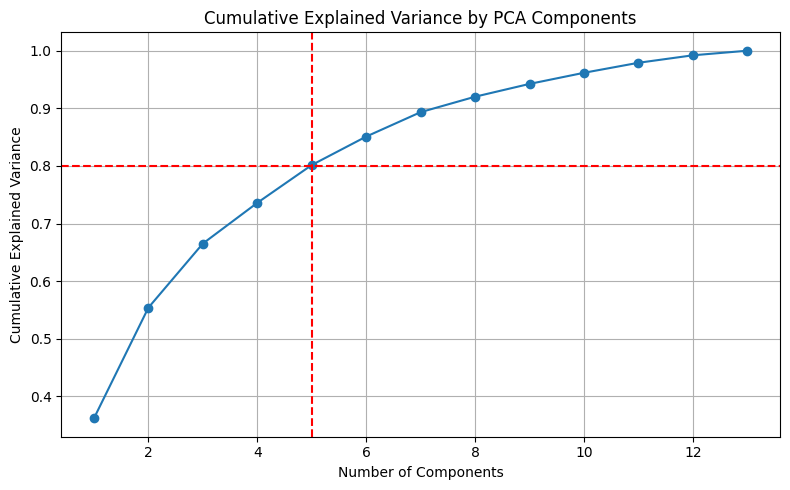

In [4]:

scaler = StandardScaler()
WINE_scaled = scaler.fit_transform(WINE)

pca = PCA()
pca_fit = pca.fit(WINE_scaled)

cumulative_variance = pca_fit.explained_variance_ratio_.cumsum()

n_components_80 = (cumulative_variance < 0.80).sum() + 1
print(f"Number of components to explain 80% variance: {n_components_80}")
print()
print(cumulative_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.axvline(x=n_components_80, color='r', linestyle='--')  
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()



KMeans with k=3

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


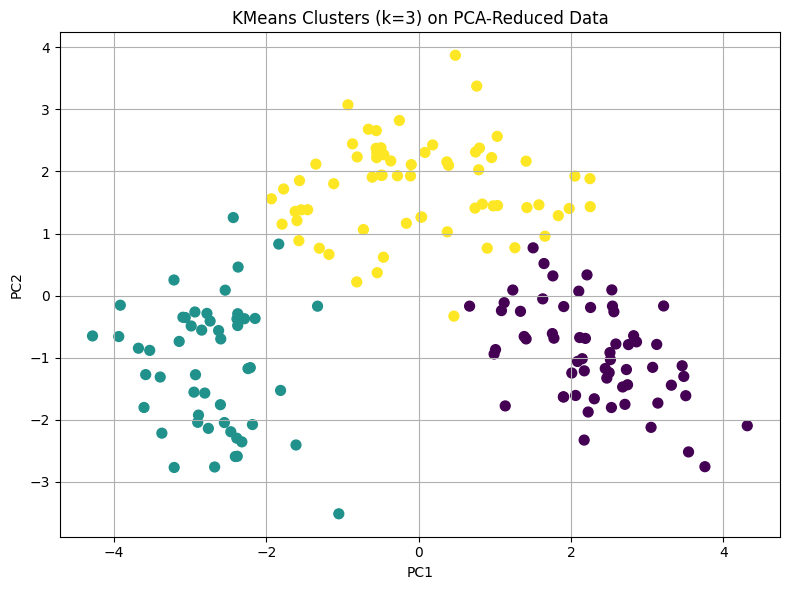

In [5]:


scaler = StandardScaler()
WINE_scaled = scaler.fit_transform(WINE)

pca = PCA()
WINE_pca_full = pca.fit_transform(WINE_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_80 = (cumulative_variance < 0.80).sum() + 1

pca_final = PCA(n_components=n_components_80)
WINE_pca = pca_final.fit_transform(WINE_scaled)

kmeans = KMeans(n_clusters=3, random_state=8555)
clusters_3 = kmeans.fit_predict(WINE_pca)

pca_df = pd.DataFrame(WINE_pca, columns=[f'PC{i+1}' for i in range(n_components_80)])
pca_df['Cluster'] = clusters_3

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters_3, cmap='viridis', s=50)
plt.title("KMeans Clusters (k=3) on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


K Means Assumptions:

Clusters are Spherical: Passed. Each clusters histogram is unimodal and tight spread of distances around the center. No cluster has an extremely long tail or skew which would indicate irregular shape. Finally, peaks of the distributions are all roughly between 1 and 2.5. All this suggest that points within each cluster are similarly close to their centroid and clusters are compact and not oddly stretched "near spherical"

Clusters have Similar Size: Passed. Cluster 0 has 61, cluster 1 has 51, and cluster 2 has 66. These give an average cluster size of 59.33. Therefore, using ((cluster size - average size) / (average size)) * 100, we see that the percent deviations from the average for cluster 0 through 2 is +2.8%, -14.0%, and +11.2%. These are within an arbitrary +-15% threshold, suggesting these sizes are very similar.

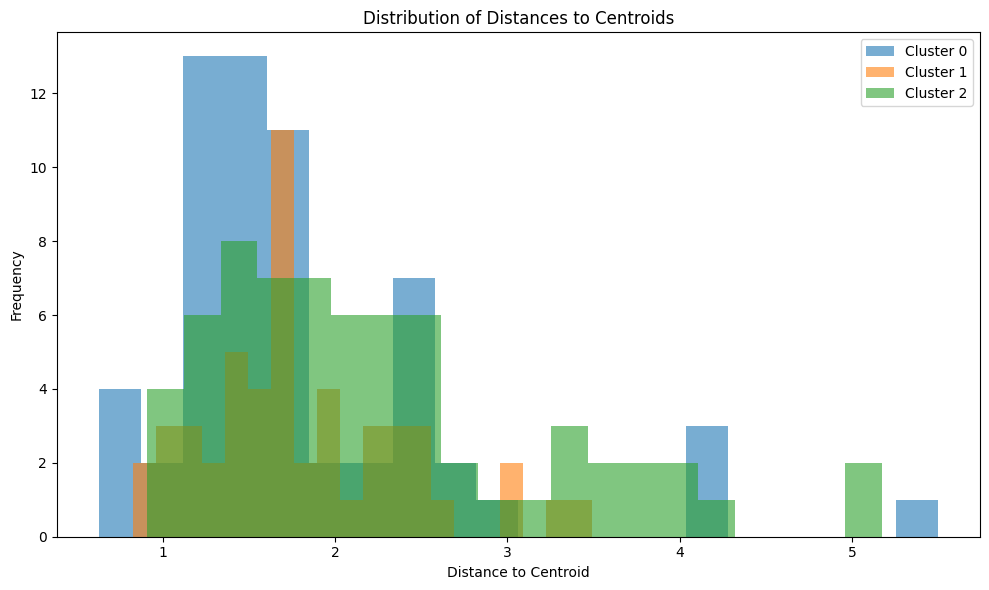

Cluster Sizes:
 Cluster
0    61
1    51
2    66
Name: count, dtype: int64


In [6]:
#Clusters are Spherical
centroids = kmeans.cluster_centers_

dists = np.linalg.norm(WINE_pca - centroids[clusters_3], axis=1)

pca_df['Distance_to_Centroid'] = dists

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.hist(pca_df[pca_df['Cluster'] == i]['Distance_to_Centroid'], bins=20, alpha=0.6, label=f'Cluster {i}')
plt.xlabel("Distance to Centroid")
plt.ylabel("Frequency")
plt.title("Distribution of Distances to Centroids")
plt.legend()
plt.tight_layout()
plt.show()

#Clusters of Similar Size
cluster_sizes = pca_df['Cluster'].value_counts().sort_index()
print("Cluster Sizes:\n", cluster_sizes)



Kmeans k=4

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


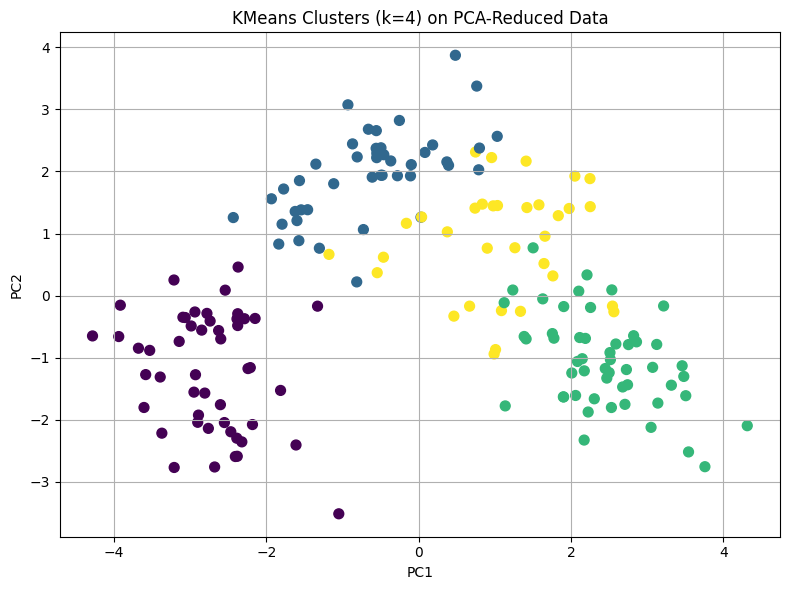

In [7]:

scaler = StandardScaler()
WINE_scaled = scaler.fit_transform(WINE)

pca = PCA()
WINE_pca_full = pca.fit_transform(WINE_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_80 = (cumulative_variance < 0.80).sum() + 1

pca_final = PCA(n_components=n_components_80)
WINE_pca = pca_final.fit_transform(WINE_scaled)

kmeans = KMeans(n_clusters=4, random_state=8555)
clusters_4 = kmeans.fit_predict(WINE_pca)

pca_df = pd.DataFrame(WINE_pca, columns=[f'PC{i+1}' for i in range(n_components_80)])
pca_df['Cluster'] = clusters_4

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters_4, cmap='viridis', s=50)
plt.title("KMeans Clusters (k=4) on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


Only tested assumptions for k means k=3 due to it being a better model. However, to check assumptions of k=4 it follows the exact same process. Plot the cluster histograms and evaluate shape. Then identify cluster sizes and calculate the percent deviation from average size of each cluster and compare to a threshold usually 15%. 

Elbow plot: shows that the elbow occurs at about 3 or 4. However, recall that the k=3 model shows clearer separation of clusters, grouping is more compact, and distinct linear boundaries between clusters. The k=4 model is a over segmented in the top middle and lower right, and one cluster overlaps with 2 other clusters. This suggest that k=3 is the optimal value. Also it is a simpler model which is another positive. 

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

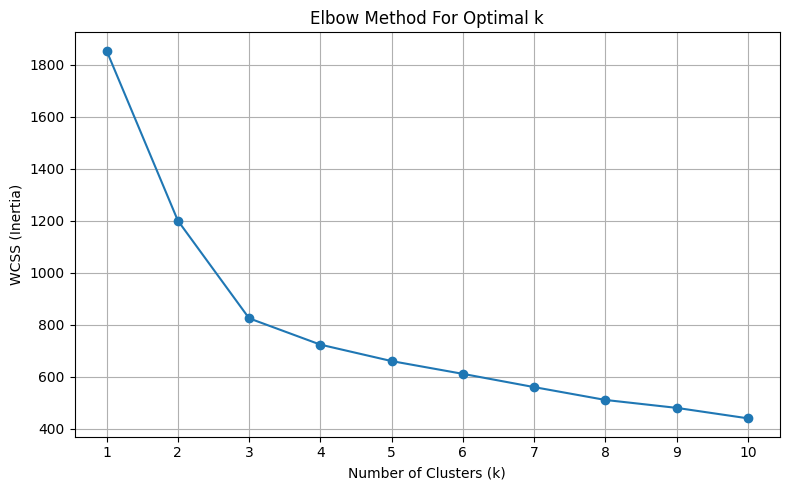

In [8]:
# Elbow plot 1 to 10 clusters
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8555)
    kmeans.fit(WINE_pca)  
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


Hierarchical Clustering

Cut at a height of 8.96 which achieves 3 clusters. 

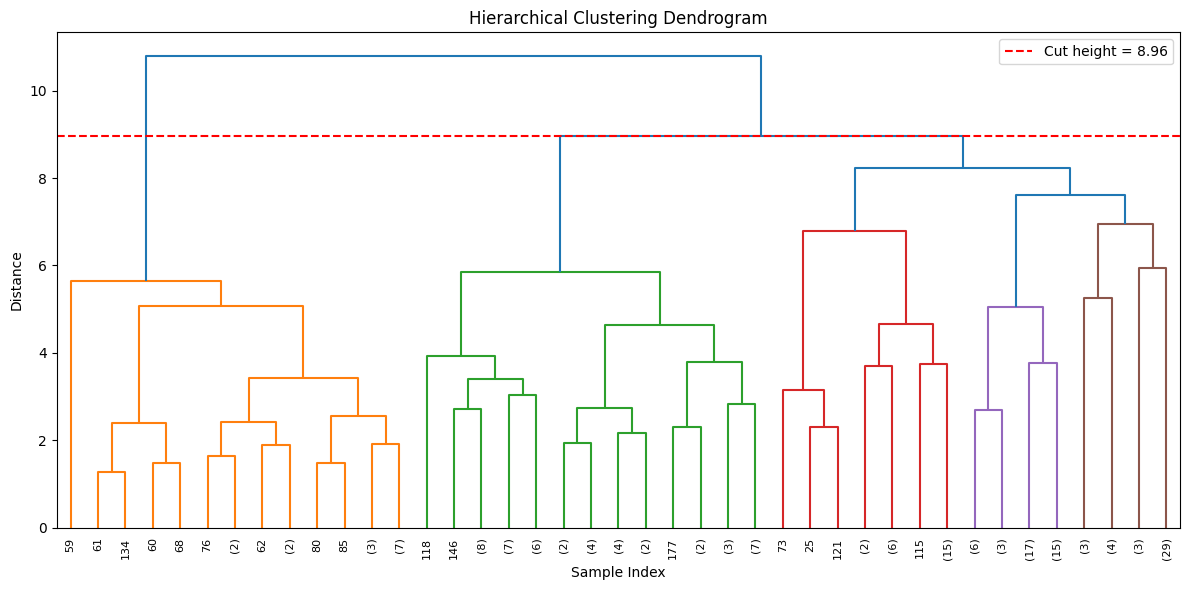

In [9]:

scaler = StandardScaler()
WINE_scaled = scaler.fit_transform(WINE)

pca = PCA()
WINE_pca_full = pca.fit_transform(WINE_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_80 = (cumulative_variance < 0.80).sum() + 1

pca_final = PCA(n_components=n_components_80)
WINE_pca = pca_final.fit_transform(WINE_scaled)

linked = linkage(WINE_pca, method='complete', metric='euclidean')

n_samples = WINE_pca.shape[0]
cut_index = n_samples - 3  
cut_height = linked[cut_index, 2] 

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.axhline(y=cut_height, color='red', linestyle='--', label=f'Cut height = {cut_height:.2f}')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()




Assumptions:

Meaningful Distance Metric: Passed. Since we used euclidean as the metric and recall we used PCA to maintain 80% variation, this assumption is likely met, however, to prove euclidean distance captures similarities well we calculate a correlation value for pairwise distances in scaled data vs the PCA space. A value close to one indicates euclidean distance is a meaningful metric in this case. Ours is 0.973 

Features on Similar Scale: Passed. Did this using standard scaler command

Hierarchical Structure Exits: Passed. The dendrogram shows there is a hierarchical structure however, to test this a cophenetic correlation can be calculated. A value greater than 0.75 indicates strong structure, 0.5 to 0.75 indicates a moderate hierarchical structure, while less than 0.5 indicates weak structure. Our value is 0.543 which is acceptable.



In [10]:

#Meaningful "euclidean" distance metric 
# Pairwise distances scaled space
dist_scaled = squareform(pdist(WINE_scaled, metric='euclidean'))

# Pairwise distances PCA-reduced space
dist_pca = squareform(pdist(WINE_pca, metric='euclidean'))

#correlation
corr, _ = spearmanr(dist_scaled.flatten(), dist_pca.flatten())
print(f"Spearman correlation between distance matrices: {corr:.3f}")



#Hierarchical Structure Exists
dist_pca = pdist(WINE_pca)

coph_dist, _ = cophenet(linked, dist_pca)

print(f"Cophenetic Correlation Coefficient: {coph_dist:.3f}")



Spearman correlation between distance matrices: 0.973
Cophenetic Correlation Coefficient: 0.543


Comparison of k=3 K-means model vs hierarchical model. 

Larger silhouette score is better.

Larger Calinski-Harabasz Score is better.

Lower Davies-Bouldin Score is better. 

K-means ourperforms hierarchical cluster model. 

In [11]:

# 3 clusters from hierarchical model
clusters_hier = fcluster(linked, t=3, criterion='maxclust')

# Silhouette Score
score_kmeans = silhouette_score(WINE_pca, clusters_3)
score_hier = silhouette_score(WINE_pca, clusters_hier)

# Calinski-Harabasz Scores 
calinski_kmeans = calinski_harabasz_score(WINE_pca, clusters_3)
calinski_hier = calinski_harabasz_score(WINE_pca, clusters_hier)

# Davies-Bouldin Scores 
db_kmeans = davies_bouldin_score(WINE_pca, clusters_3)
db_hier = davies_bouldin_score(WINE_pca, clusters_hier)

# Print comparison
print(f"KMeans Silhouette Score (k=3): {score_kmeans:.3f}")
print(f"Hierarchical Silhouette Score (k=3): {score_hier:.3f}")
print()
print(f"KMeans Calinski-Harabasz Score: {calinski_kmeans:.2f}")
print(f"Hierarchical Calinski-Harabasz Score: {calinski_hier:.2f}")
print()
print(f"KMeans Davies-Bouldin Score: {db_kmeans:.3f}")
print(f"Hierarchical Davies-Bouldin Score: {db_hier:.3f}")



KMeans Silhouette Score (k=3): 0.368
Hierarchical Silhouette Score (k=3): 0.228

KMeans Calinski-Harabasz Score: 109.19
Hierarchical Calinski-Harabasz Score: 60.45

KMeans Davies-Bouldin Score: 1.094
Hierarchical Davies-Bouldin Score: 1.386


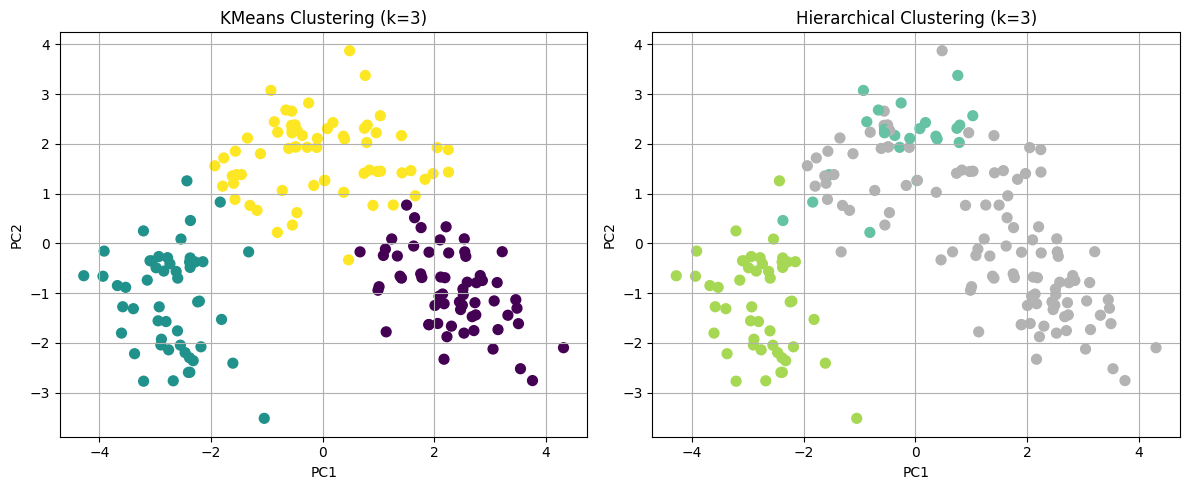

In [12]:
plt.figure(figsize=(12, 5))

# KMeans plot
plt.subplot(1, 2, 1)
plt.scatter(WINE_pca[:, 0], WINE_pca[:, 1], c=clusters_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# Hierarchical plot
plt.subplot(1, 2, 2)
plt.scatter(WINE_pca[:, 0], WINE_pca[:, 1], c=clusters_hier, cmap='Set2', s=50)
plt.title("Hierarchical Clustering (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.tight_layout()
plt.show()
